# Pandas 簡介

## Pandas 是 Python 裡面被用來作資料分析及整理最常用的套件。

### 這一份筆記主要說明以下重點：

* 資料結構及其基本操作
  - Series
  - DataFrame
* 網路資料存取
* 資料視覺化
* 資料分組及聚合

參考資料：

* [Python Data Analysis Library](http://pandas.pydata.org/)
* [Pandas Cookbook](http://pandas.pydata.org/pandas-docs/version/0.18.0/cookbook.html)
* [Pandas 入門介紹](https://github.com/Wei1234c/Introduction_to_Pandas)
* [Financial Time Series](https://github.com/yhilpisch/py4fi/blob/master/ipython3/06_Financial_Time_Series.ipynb)
* [Pandas API references](http://pandas.pydata.org/pandas-docs/stable/api.html#api-dataframe-stats)

In [1]:
import pandas as pd

pd.__version__

'0.23.4'

In [2]:
%matplotlib inline

import numpy as np
from datetime import datetime

## Pandas 的資料結構

### Series

In [3]:
s = pd.Series([1, 2, 3, 4, 5])
s

0    1
1    2
2    3
3    4
4    5
dtype: int64

#### Series 跟 ndarray 有什麼不同呢？

In [4]:
s.values

array([1, 2, 3, 4, 5], dtype=int64)

In [5]:
s.index

RangeIndex(start=0, stop=5, step=1)

#### index 可以在創建 Series 時指定

In [6]:
s = pd.Series(range(5), index=list('abcde'))

In [7]:
s

a    0
b    1
c    2
d    3
e    4
dtype: int64

#### index 也可以在創建完 Series 後指定

In [8]:
s.index = list('fghij')
s

f    0
g    1
h    2
i    3
j    4
dtype: int64

#### 什麼是 reindex？

In [9]:
s.reindex(list('hijabcd'))

h    2.0
i    3.0
j    4.0
a    NaN
b    NaN
c    NaN
d    NaN
dtype: float64

In [10]:
s

f    0
g    1
h    2
i    3
j    4
dtype: int64

### DataFrame

In [11]:
data = np.random.randn(10, 4)

In [12]:
df = pd.DataFrame(data)
df

,0,1,2,3
0,0.223708,1.408029,1.349756,0.757953
1,-2.003944,-0.962365,0.762400,-1.025047
2,-0.876902,1.101417,-0.907696,0.422559
3,-1.005724,-0.323304,0.360163,0.603816
4,-1.296204,0.072811,1.852602,0.950694
5,-0.456404,-0.198608,0.681353,0.262912
6,0.525160,-0.411064,0.055547,0.619856
7,0.189270,1.425743,1.236458,-0.917126
8,0.924788,-0.433809,-0.476563,0.940391
9,1.928159,0.830349,-0.275443,0.189153


In [13]:
df.columns = ['No1', 'No2', 'No3', 'No4']
df

,No1,No2,No3,No4
0,0.223708,1.408029,1.349756,0.757953
1,-2.003944,-0.962365,0.762400,-1.025047
2,-0.876902,1.101417,-0.907696,0.422559
3,-1.005724,-0.323304,0.360163,0.603816
4,-1.296204,0.072811,1.852602,0.950694
5,-0.456404,-0.198608,0.681353,0.262912
6,0.525160,-0.411064,0.055547,0.619856
7,0.189270,1.425743,1.236458,-0.917126
8,0.924788,-0.433809,-0.476563,0.940391
9,1.928159,0.830349,-0.275443,0.189153


In [14]:
df.index = pd.date_range('2016-01-01', periods=10)
df

,No1,No2,No3,No4
2016-01-01,0.223708,1.408029,1.349756,0.757953
2016-01-02,-2.003944,-0.962365,0.762400,-1.025047
2016-01-03,-0.876902,1.101417,-0.907696,0.422559
2016-01-04,-1.005724,-0.323304,0.360163,0.603816
2016-01-05,-1.296204,0.072811,1.852602,0.950694
2016-01-06,-0.456404,-0.198608,0.681353,0.262912
2016-01-07,0.525160,-0.411064,0.055547,0.619856
2016-01-08,0.189270,1.425743,1.236458,-0.917126
2016-01-09,0.924788,-0.433809,-0.476563,0.940391
2016-01-10,1.928159,0.830349,-0.275443,0.189153


In [15]:
df.loc['2016-01-06']

No1   -0.456404
No2   -0.198608
No3    0.681353
No4    0.262912
Name: 2016-01-06 00:00:00, dtype: float64

In [16]:
df.drop(datetime(2016, 1, 3), inplace=True)
df

,No1,No2,No3,No4
2016-01-01,0.223708,1.408029,1.349756,0.757953
2016-01-02,-2.003944,-0.962365,0.762400,-1.025047
2016-01-04,-1.005724,-0.323304,0.360163,0.603816
2016-01-05,-1.296204,0.072811,1.852602,0.950694
2016-01-06,-0.456404,-0.198608,0.681353,0.262912
2016-01-07,0.525160,-0.411064,0.055547,0.619856
2016-01-08,0.189270,1.425743,1.236458,-0.917126
2016-01-09,0.924788,-0.433809,-0.476563,0.940391
2016-01-10,1.928159,0.830349,-0.275443,0.189153


In [17]:
df.index=range(9)
df

,No1,No2,No3,No4
0,0.223708,1.408029,1.349756,0.757953
1,-2.003944,-0.962365,0.762400,-1.025047
2,-1.005724,-0.323304,0.360163,0.603816
3,-1.296204,0.072811,1.852602,0.950694
4,-0.456404,-0.198608,0.681353,0.262912
5,0.525160,-0.411064,0.055547,0.619856
6,0.189270,1.425743,1.236458,-0.917126
7,0.924788,-0.433809,-0.476563,0.940391
8,1.928159,0.830349,-0.275443,0.189153


In [18]:
df.iloc[1]

No1   -2.003944
No2   -0.962365
No3    0.762400
No4   -1.025047
Name: 1, dtype: float64

In [19]:
df.drop(4)

,No1,No2,No3,No4
0,0.223708,1.408029,1.349756,0.757953
1,-2.003944,-0.962365,0.762400,-1.025047
2,-1.005724,-0.323304,0.360163,0.603816
3,-1.296204,0.072811,1.852602,0.950694
5,0.525160,-0.411064,0.055547,0.619856
6,0.189270,1.425743,1.236458,-0.917126
7,0.924788,-0.433809,-0.476563,0.940391
8,1.928159,0.830349,-0.275443,0.189153


## 使用 Pandas 作資料存取

### 這一部分包括底下幾個重點：

* read_csv() 的使用
* read_html() 的使用
* 如何抓取股市資訊？

底下練習一下將 [台灣證券交易所 - 加權股價指數歷史資料](http://www.tse.com.tw/ch/trading/indices/MI_5MINS_HIST/MI_5MINS_HIST.php#) 的資料轉成 DataFrame。

### 使用 read_csv() 讀取資料

參考連結：[pandas.read_csv](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html)

In [20]:
df = pd.read_csv("data/MI_5MINS_HIST10603.csv", encoding="Big5", header=1)

In [21]:
df

,日期,開盤指數,最高指數,最低指數,收盤指數
0,106/03/01,"9,751.12","9,758.78","9,674.78","9,674.78"
1,106/03/02,"9,727.60","9,774.60","9,646.34","9,691.80"
2,106/03/03,"9,672.26","9,679.82","9,633.88","9,648.21"
3,106/03/06,"9,647.00","9,688.50","9,647.00","9,682.63"
4,106/03/07,"9,690.26","9,738.07","9,690.20","9,738.07"
5,106/03/08,"9,744.26","9,773.49","9,712.50","9,753.45"
6,106/03/09,"9,740.05","9,743.78","9,650.32","9,658.61"
7,106/03/10,"9,653.79","9,656.65","9,562.75","9,627.89"
8,106/03/13,"9,656.56","9,697.34","9,656.56","9,697.34"
9,106/03/14,"9,720.53","9,767.66","9,720.53","9,744.21"


In [22]:
df.drop(df.index[len(df.index)-1], inplace=True)
df

,日期,開盤指數,最高指數,最低指數,收盤指數
0,106/03/01,"9,751.12","9,758.78","9,674.78","9,674.78"
1,106/03/02,"9,727.60","9,774.60","9,646.34","9,691.80"
2,106/03/03,"9,672.26","9,679.82","9,633.88","9,648.21"
3,106/03/06,"9,647.00","9,688.50","9,647.00","9,682.63"
4,106/03/07,"9,690.26","9,738.07","9,690.20","9,738.07"
5,106/03/08,"9,744.26","9,773.49","9,712.50","9,753.45"
6,106/03/09,"9,740.05","9,743.78","9,650.32","9,658.61"
7,106/03/10,"9,653.79","9,656.65","9,562.75","9,627.89"
8,106/03/13,"9,656.56","9,697.34","9,656.56","9,697.34"
9,106/03/14,"9,720.53","9,767.66","9,720.53","9,744.21"


### 使用 read_html() 讀取資料

參考連結：[pandas.read_html](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_html.html)

In [23]:
import requests
from bs4 import BeautifulSoup

In [24]:
r = requests.get("http://www.tse.com.tw/ch/trading/indices/MI_5MINS_HIST/MI_5MINS_HIST.php")
r.encoding = 'Big5'

In [25]:
soup = BeautifulSoup(r.text, "lxml")
tables = soup.select("table.board_trad")
tables

[]

In [26]:
type(tables[0])

IndexError: list index out of range

In [ ]:
df_list = pd.read_html(str(tables[0]), header=1)

In [ ]:
df_list[0]

### 使用 Pandas 讀取股價資訊

參考資料：[pandas-datareadre 說明文件](https://pandas-datareader.readthedocs.io/en/latest/)

In [28]:
# 網路上有人提到在使用pandas_datareader前加入這一行，果然可以
# ref: https://stackoverflow.com/questions/50394873/import-pandas-datareader-gives-importerror-cannot-import-name-is-list-like
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like

import pandas_datareader.data as web
from datetime import datetime

In [29]:
df = web.DataReader("TSLA", 'google', datetime(2016,1,1))
df['Close'].plot()

C:\Users\Malo\Anaconda3\lib\site-packages\pandas_datareader\google\daily.py:40: UnstableAPIWarning: 
The Google Finance API has not been stable since late 2017. Requests seem
to fail at random. Failure is especially common when bulk downloading.

  warnings.warn(UNSTABLE_WARNING, UnstableAPIWarning)


RemoteDataError: Unable to read URL: https://finance.google.com/finance/historical?q=TSLA&startdate=Jan+01%2C+2016&enddate=Aug+27%2C+2018&output=csv
Response Text:
b'<html><head><meta http-equiv="content-type" content="text/html; charset=utf-8"/><title>Sorry...</title><style> body { font-family: verdana, arial, sans-serif; background-color: #fff; color: #000; }</style></head><body><div><table><tr><td><b><font face=sans-serif size=10><font color=#4285f4>G</font><font color=#ea4335>o</font><font color=#fbbc05>o</font><font color=#4285f4>g</font><font color=#34a853>l</font><font color=#ea4335>e</font></font></b></td><td style="text-align: left; vertical-align: bottom; padding-bottom: 15px; width: 50%"><div style="border-bottom: 1px solid #dfdfdf;">Sorry...</div></td></tr></table></div><div style="margin-left: 4em;"><h1>We\'re sorry...</h1><p>... but your computer or network may be sending automated queries. To protect our users, we can\'t process your request right now.</p></div><div style="margin-left: 4em;">See <a href="https://support.google.com/websearch/answer/86640">Google Help</a> for more information.<br/><br/></div><div style="text-align: center; border-top: 1px solid #dfdfdf;"><a href="https://www.google.com">Google Home</a></div></body></html>'

## 資料視覺化

Series 跟 DataFrame 都附帶有一個產生各類圖表的 plot()，預設的情況下，它會產生線形圖。

參考資料：[Pandas Plotting](http://pandas.pydata.org/pandas-docs/stable/visualization.html)

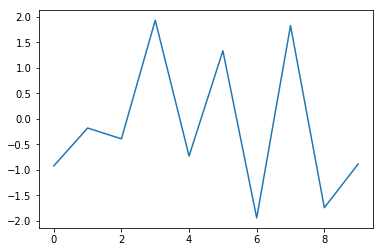

In [30]:
s = pd.Series(np.random.randn(10), index=np.arange(10))
s.plot()

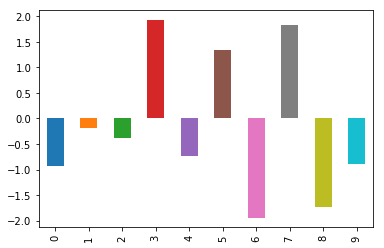

In [31]:
s.plot(kind="bar")

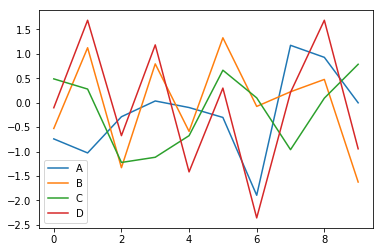

In [32]:
df = pd.DataFrame(np.random.randn(10, 4), columns=list('ABCD'))
df.plot()

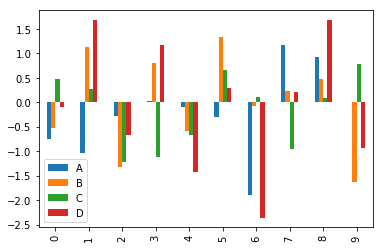

In [33]:
df.plot(kind='bar')

## 資料分組與聚合

In [34]:
data = np.random.randn(10, 4)

In [35]:
df = pd.DataFrame(data, columns=['No1', 'No2', 'No3', 'No4'])
df

,No1,No2,No3,No4
0,-0.210793,-0.518460,0.715929,-1.617862
1,1.026097,0.464711,-0.773828,1.219992
2,-2.067314,-0.255736,0.464411,-1.272690
3,0.124274,-1.587399,0.474326,0.323018
4,0.575166,-1.549705,-1.186413,1.872610
5,-1.656830,0.721160,-0.965723,1.276203
6,-1.525263,0.539800,-0.699614,1.208192
7,-0.341133,-0.950700,-0.498243,-1.635750
8,-0.597655,1.911860,1.455107,-0.316692
9,1.060322,0.446582,-0.012720,0.824608


In [36]:
df['Category'] = np.NaN
df

,No1,No2,No3,No4,Category
0,-0.210793,-0.518460,0.715929,-1.617862,NaN
1,1.026097,0.464711,-0.773828,1.219992,NaN
2,-2.067314,-0.255736,0.464411,-1.272690,NaN
3,0.124274,-1.587399,0.474326,0.323018,NaN
4,0.575166,-1.549705,-1.186413,1.872610,NaN
5,-1.656830,0.721160,-0.965723,1.276203,NaN
6,-1.525263,0.539800,-0.699614,1.208192,NaN
7,-0.341133,-0.950700,-0.498243,-1.635750,NaN
8,-0.597655,1.911860,1.455107,-0.316692,NaN
9,1.060322,0.446582,-0.012720,0.824608,NaN


In [37]:
clist = ['C1'] * 3 + ['C2'] * 5 + ['C3'] * 2

In [38]:
df['Category'] = np.random.permutation(clist)

In [39]:
df

,No1,No2,No3,No4,Category
0,-0.210793,-0.518460,0.715929,-1.617862,C2
1,1.026097,0.464711,-0.773828,1.219992,C1
2,-2.067314,-0.255736,0.464411,-1.272690,C2
3,0.124274,-1.587399,0.474326,0.323018,C2
4,0.575166,-1.549705,-1.186413,1.872610,C3
5,-1.656830,0.721160,-0.965723,1.276203,C2
6,-1.525263,0.539800,-0.699614,1.208192,C1
7,-0.341133,-0.950700,-0.498243,-1.635750,C2
8,-0.597655,1.911860,1.455107,-0.316692,C3
9,1.060322,0.446582,-0.012720,0.824608,C1


In [40]:
groups = df.groupby('Category')

In [41]:
groups

In [42]:
groups.mean()

,No1,No2,No3,No4
Category,,,,
C1,0.187052,0.483697,-0.495388,1.084264
C2,-0.830359,-0.518227,0.038140,-0.585416
C3,-0.011245,0.181077,0.134347,0.777959
